<a href="https://colab.research.google.com/github/llskyhi/109-2_BigDataProgramming/blob/main/0330_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
install.packages(
  c(
    "rJava",
    "jiebaR",
    "tmcn",
    "dplyr",
    "lubridate",
    "stringr",
    "wordcloud",
    "showtext"
  )
)
install.packages(
  "Rwordseg",
  repos="http://R-Forge.R-project.org"
)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘HMM’ is not available”
Warning message in install.packages("Rwordseg", repos = "http://R-Forge.R-project.org"):
“installation of package ‘Rwordseg’ had non-zero exit status”


In [39]:
library(dplyr)
library(lubridate)
library(stringr)
library(jiebaR)
library(wordcloud)
library(showtext)
showtext_auto(enable = T)

In [28]:
content <- 
"嚴重特殊傳染性肺炎疫情持續在全球蔓延，已造成三千多萬⼈感染，死亡⼈數破百萬⼈，歐美醫療體系幾近崩潰，各種⾏動限制對於各國之經濟更有莫⼤之衝擊。
然⽽台灣未實⾏⼤規模封鎖⾏動，維持正常上班上課與各種經濟活動，至今無⼤規模疫情爆發，醫療體系也仍能正常提供民眾服務，顯⽰台灣的防疫政策正確⽽有效，
獲得世界各國⾼度肯定。國家衛⽣研究院群體健康科學研究所與感染症與疫苗研究所合作，利⽤真實數據與數學模型證實，良好的邊境管控，詳盡的疫情調查，
確實的隔離與檢疫，以及民眾遵⾏防疫措施，為台灣抗疫四⼤⽀柱。台灣也對世界各國提供各項協助與經驗分享，期望幫助各國盡快從疫情的陰霾中⾛出。"
content <- str_remove_all(content, "[0-9a-zA-Z]+")
cutter <- worker(bylines = F)
cutter[content]

[1] "嚴重"     "特殊"     "傳染性"   "肺炎"     "疫情"     "持續"    
  [7] "在"       "全球"     "蔓延"     "已"       "造成"     "三千多萬"
 [13] "⼈"       "感染"     "死亡"     "⼈"       "數"       "破"      
 [19] "百萬"     "⼈"       "歐美"     "醫療"     "體系"     "幾近"    
 [25] "崩潰"     "各種"     "⾏"       "動"       "限制"     "對於"    
 [31] "各國"     "之"       "經濟"     "更"       "有莫"     "⼤"      
 [37] "之"       "衝擊"     "然"       "⽽"       "台"       "灣"      
 [43] "未"       "實"       "⾏"       "⼤"       "規模"     "封鎖"    
 [49] "⾏"       "動"       "維持"     "正常"     "上班"     "上課"    
 [55] "與"       "各種"     "經濟"     "活動"     "至今"     "無"      
 [61] "⼤"       "規模"     "疫情"     "爆發"     "醫療"     "體系"    
 [67] "也"       "仍"       "能"       "正常"     "提供"     "民眾"    
 [73] "服務"     "顯"       "⽰"       "台"       "灣"       "的"      
 [79] "防疫"     "政策"     "正確"     "⽽"       "有效"     "獲得"    
 [85] "世界"     "各國"     "⾼"       "度"       "肯定"     "國家"    
 [91] "衛"       "⽣"       "研究院"   "群體"     "健康"     "科學"    
 [97] "研究所"   "與"       "感染"     "症"       "與"       "疫苗"    
[103] "研究所"   "合作"     "利"       "⽤"       "真實"     "數據"    
[109] "與"       "數學模型" "證實"     "良好"     "的"       "邊境"    
[115] "管控"     "詳盡"     "的"       "疫情"     "調查"     "確實"    
[121] "的"       "隔離"     "與"       "檢疫"     "以及"     "民眾遵"  
[127] "⾏"       "防疫"     "措施"     "為"       "台灣"     "抗疫四"  
[133] "⼤"       "⽀"       "柱"       "台灣"     "也"       "對"      
[139] "世界"     "各國"     "提供"     "各項"     "協助"     "與"      
[145] "經驗"     "分享"     "期望"     "幫助"     "各國"     "盡快"    
[151] "從"       "疫情"     "的"       "陰霾"     "中"       "⾛"      
[157] "出"

In [54]:
new.words <- c("傳染性肺炎", "醫療體系", "防疫措施", "台灣", "臺灣", "然而", "行動", "遵行")
#for(i in 1:length(new.words)){
#  new_user_word(cutter, new.words[i])
#}
writeLines(new.words, "new_words.txt")
stop.words <- c("在", "之", "更", "個", "未", "而", "也", "與", "的")
writeLines(stop.words, "stop_words.txt")

cutter <- worker(
  user = "new_words.txt",
  stop_word = "stop_words.txt",
  bylines = F
)
seg.words <- cutter[content]
#seg.words
word.freq <- freq(seg.words)
word.freq <- arrange(word.freq, desc(freq))
head(word.freq, 10)

,char,freq
,<chr>,<dbl>
1,各國,4
2,⼤,4
3,⾏,4
4,疫情,4
5,台灣,4
6,⼈,3
7,各種,2
8,動,2
9,⽽,2


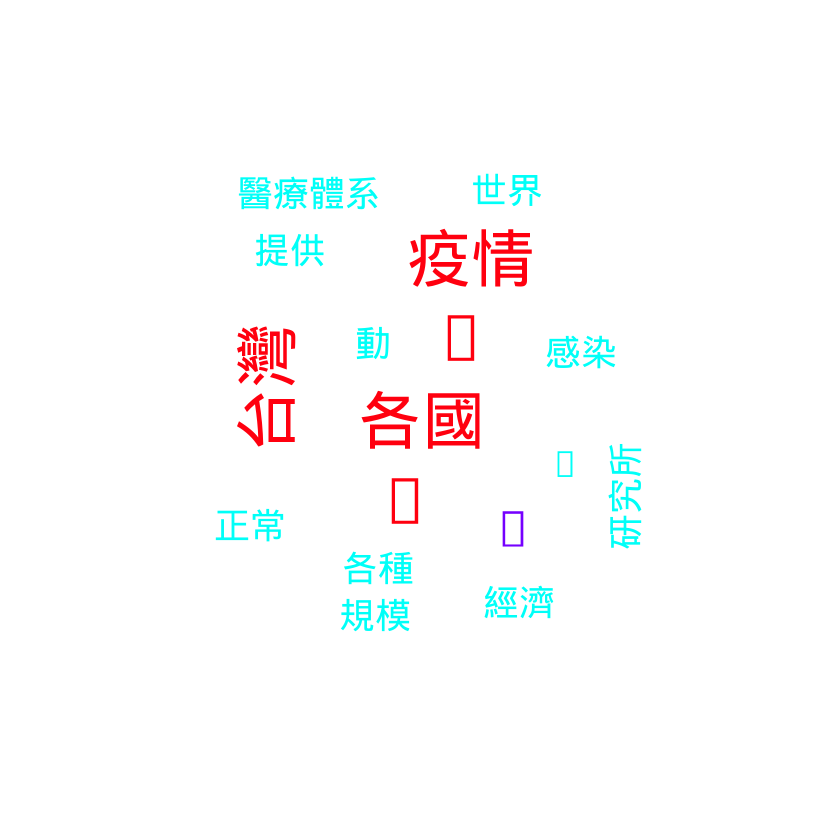

In [56]:
#par(family = ("Microsoft YaHei"))
par(family = ("wqy-microhei"))

wordcloud(
  word.freq$char,
  word.freq$freq,
  min.freq = 2,
  random.order = F,
  ordered.colors = F,
  colors = rainbow(nrow(word.freq))
)